kgmyh@naver.com 으로 `이름_주유소가격 데이터 분석.html` 로 제출
- html 파일로 변환
    - File > Download as > HTML (.html) 선택

# 데이터 불러오기

- 2022년 주유소들의 일자별 가격 데이터
- https://www.opinet.co.kr/user/opdown/opDownload.do

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 상반기, 하반기 주유소 가격 데이터 조회
d1 = pd.read_csv('data/2022년_서울_상반기_일별_가격.csv', encoding="cp949")
d2 = pd.read_csv('data/2022년_서울_하반기_일별_가격.csv', encoding="cp949")

In [7]:
# 상반기, 하반기 DataFrame 합치기
df = pd.concat([d1, d2], ignore_index=True) # 원본의 index이름을 무시하고 붙인다. 
df

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220101,SK에너지,셀프,1887,1737,1587,0
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220102,SK에너지,셀프,1887,1737,1587,0
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220103,SK에너지,셀프,1887,1737,1587,0
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220104,SK에너지,셀프,1887,1737,1587,0
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220105,SK에너지,셀프,1887,1737,1587,0
...,...,...,...,...,...,...,...,...,...,...,...
164477,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221227,GS칼텍스,셀프,0,1525,1745,0
164478,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221228,GS칼텍스,셀프,0,1525,1720,0
164479,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221229,GS칼텍스,셀프,0,1525,1720,0
164480,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221230,GS칼텍스,셀프,0,1515,1715,0


In [8]:
# DataFrame 기본 정보 조회
## shape
df.shape

(164482, 11)

In [9]:
## 컬럼정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164482 entries, 0 to 164481
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   번호      164482 non-null  object
 1   지역      164482 non-null  object
 2   상호      164482 non-null  object
 3   주소      164482 non-null  object
 4   기간      164482 non-null  int64 
 5   상표      164482 non-null  object
 6   셀프여부    164482 non-null  object
 7   고급휘발유   164482 non-null  int64 
 8   휘발유     164482 non-null  int64 
 9   경유      164482 non-null  int64 
 10  실내등유    164482 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 13.8+ MB


In [10]:
## 결측치
df.isnull().sum()

번호       0
지역       0
상호       0
주소       0
기간       0
상표       0
셀프여부     0
고급휘발유    0
휘발유      0
경유       0
실내등유     0
dtype: int64

In [11]:
### 통계량
df.describe()  # 수치형

,기간,고급휘발유,휘발유,경유,실내등유
count,1.644820e+05,164482.000000,164482.000000,164482.000000,164482.000000
mean,2.022066e+07,1083.639146,1877.600838,1907.360337,538.948444
std,3.456995e+02,1085.018886,243.317021,237.067045,761.401689
min,2.022010e+07,0.000000,0.000000,0.000000,0.000000
25%,2.022033e+07,0.000000,1690.000000,1817.000000,0.000000
50%,2.022063e+07,1760.000000,1855.000000,1899.000000,0.000000
75%,2.022093e+07,2130.000000,2030.000000,2018.000000,1451.000000
max,2.022123e+07,3496.000000,3096.000000,3230.000000,2719.000000


In [12]:
### 문자형의 통계량
df.describe(include="object")

,번호,지역,상호,주소,상표,셀프여부
count,164482,164482,164482,164482,164482,164482
unique,469,25,464,469,7,2
top,A0006039,서울 강남구,대성주유소,서울 강남구 논현로 640,SK에너지,셀프
freq,365,12278,730,365,48267,92478


In [13]:
# 상표 컬럼의 고유값 조회
df['상표'].value_counts()

상표
SK에너지     48267
현대오일뱅크    42351
GS칼텍스     40449
S-OIL     28762
알뜰주유소      3551
자가상표        737
알뜰(ex)      365
Name: count, dtype: int64

In [14]:
# 지역 컬럼의 고유값 조회
df['지역'].value_counts()

지역
서울 강남구     12278
서울 강서구     11825
서울 송파구     11295
서울 서초구     11231
서울 영등포구     9814
서울 양천구      9015
서울 성북구      8522
서울 구로구      7384
서울 동대문구     6574
서울 성동구      6006
서울 도봉구      5992
서울 은평구      5807
서울 노원구      5474
서울 서대문구     5472
서울 강동구      5110
서울 광진구      5107
서울 관악구      5104
서울 중랑구      4873
서울 용산구      4637
서울 강북구      4460
서울 마포구      4375
서울 금천구      4067
서울 중구       3643
서울 동작구      3436
서울 종로구      2981
Name: count, dtype: int64

In [15]:
## self 여부
df['셀프여부'].value_counts()

셀프여부
셀프    92478
일반    72004
Name: count, dtype: int64

> ### str accessor
> - `Series.str.String메소드()`
> - 문자열 타입 Series에 String 메소드들을 사용하여 일괄처리 할 수 있도록 한다.
> - str accessor 메소드 : https://pandas.pydata.org/pandas-docs/stable/reference/series.html#api-series-str

> ### datetime으로 변환
> - `pd.to_datetime(변환할 Series, format="날짜형식")`
> - x 또는 y 축이 날짜 일 경우 datetime 타입으로 처리하는 것이 좋다.
> - format: 년월일의 형식을 strftime 형식문자열로 지정한다. 
>      - [strftime 형식](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes)  
> - datetime을 변환하면 날짜만의 기능을 다룰 수 있다.
>     - dt accessor를 이용해 datetime의 속성값들을(년, 월, 일 등) 추출할 수 있다.
>     - https://pandas.pydata.org/pandas-docs/stable/reference/series.html#datetime-properties


In [20]:
"서울,강남구".split(",")
"서울 강남구".split()[1]

'강남구'

In [25]:
# 지역 컬럼의 값을 이용하여 "구" 컬럼 생성 (지역에서 구만 추출해서 파생변수컬럼 생성)
# df['지역'].apply(lambda addr : addr.split()[1])
df['구'] = df['지역'].str.split(expand=True)[1]

In [27]:
df.drop(columns='지역', inplace=True)

In [28]:
df.head()

,번호,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구
0,A0006039,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220101,SK에너지,셀프,1887,1737,1587,0,강남구
1,A0006039,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220102,SK에너지,셀프,1887,1737,1587,0,강남구
2,A0006039,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220103,SK에너지,셀프,1887,1737,1587,0,강남구
3,A0006039,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220104,SK에너지,셀프,1887,1737,1587,0,강남구
4,A0006039,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220105,SK에너지,셀프,1887,1737,1587,0,강남구


In [34]:
# 기간 컬럼을 datetime 타입으로 변경 ==> to_datetime()
### 기간: int
df['기간'] = pd.to_datetime(df['기간'], format="%Y%m%d")  # 2022: 4자리, 01: 두자리, 02: 두자리.
df.head()

,번호,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구
0,A0006039,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-01,SK에너지,셀프,1887,1737,1587,0,강남구
1,A0006039,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-02,SK에너지,셀프,1887,1737,1587,0,강남구
2,A0006039,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-03,SK에너지,셀프,1887,1737,1587,0,강남구
3,A0006039,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-04,SK에너지,셀프,1887,1737,1587,0,강남구
4,A0006039,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-05,SK에너지,셀프,1887,1737,1587,0,강남구


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164482 entries, 0 to 164481
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   번호      164482 non-null  object        
 1   상호      164482 non-null  object        
 2   주소      164482 non-null  object        
 3   기간      164482 non-null  datetime64[ns]
 4   상표      164482 non-null  object        
 5   셀프여부    164482 non-null  object        
 6   고급휘발유   164482 non-null  int64         
 7   휘발유     164482 non-null  int64         
 8   경유      164482 non-null  int64         
 9   실내등유    164482 non-null  int64         
 10  구       164482 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 13.8+ MB


In [41]:
# 기간 컬럼을 이용해 "월", "일", "요일" 컬럼 생성 (dt accessor 이용)
df['월'] = df['기간'].dt.month
df['일'] = df['기간'].dt.day
df['요일'] = df['기간'].dt.weekday  # 0: 월 ~ 6:일
df.head()

,번호,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
0,A0006039,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-01,SK에너지,셀프,1887,1737,1587,0,강남구,1,1,5
1,A0006039,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-02,SK에너지,셀프,1887,1737,1587,0,강남구,1,2,6
2,A0006039,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-03,SK에너지,셀프,1887,1737,1587,0,강남구,1,3,0
3,A0006039,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-04,SK에너지,셀프,1887,1737,1587,0,강남구,1,4,1
4,A0006039,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-05,SK에너지,셀프,1887,1737,1587,0,강남구,1,5,2


In [44]:
"월화수목금토일"[5]

'토'

In [47]:
# 요일 - 0:월, 1:화, 2:수, 3:목, 4:금, 5:토, 6:일 로 변경
df['요일'] = df['요일'].apply(lambda x: "월화수목금토일"[x])  #+"요일")

In [48]:
df.head()

,번호,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
0,A0006039,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-01,SK에너지,셀프,1887,1737,1587,0,강남구,1,1,토
1,A0006039,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-02,SK에너지,셀프,1887,1737,1587,0,강남구,1,2,일
2,A0006039,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-03,SK에너지,셀프,1887,1737,1587,0,강남구,1,3,월
3,A0006039,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-04,SK에너지,셀프,1887,1737,1587,0,강남구,1,4,화
4,A0006039,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-05,SK에너지,셀프,1887,1737,1587,0,강남구,1,5,수


In [53]:
# 전처리한 DataFrame -> 저장.
df.to_csv('data/2022년_서울주유소_데이터셋.csv', index=False)

AttributeError: 'NoneType' object has no attribute 'head'

In [56]:
# 휘발유 가격이 가장 비싼 5개 행 조회
df.sort_values("휘발유", ascending=False).head(5)

,번호,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
78935,A0000767,서남주유소,서울 중구 통일로 30,2022-06-22,SK에너지,일반,3496,3096,3223,2719,중구,6,22,수
78939,A0000767,서남주유소,서울 중구 통일로 30,2022-06-26,SK에너지,일반,3496,3096,3223,2719,중구,6,26,일
78937,A0000767,서남주유소,서울 중구 통일로 30,2022-06-24,SK에너지,일반,3496,3096,3223,2719,중구,6,24,금
78936,A0000767,서남주유소,서울 중구 통일로 30,2022-06-23,SK에너지,일반,3496,3096,3223,2719,중구,6,23,목
78940,A0000767,서남주유소,서울 중구 통일로 30,2022-06-27,SK에너지,일반,3496,3096,3223,2719,중구,6,27,월


In [59]:
# 휘발유 가격이 가장 저렴한 5개 행 조회 (단 0원인 주유소 제외)
df.query("휘발유 != 0").sort_values('휘발유').head(5)

,번호,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
99498,A0000519,화곡역주유소,서울 강서구 강서로 154 (화곡동),2022-12-27,알뜰주유소,셀프,0,1410,1660,0,강서구,12,27,화
97839,A0000549,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),2022-12-24,현대오일뱅크,셀프,0,1410,1660,0,강서구,12,24,토
97840,A0000549,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),2022-12-25,현대오일뱅크,셀프,0,1410,1660,0,강서구,12,25,일
148433,A0001005,현대주유소,서울 양천구 남부순환로 372 (신월동),2022-12-26,S-OIL,셀프,0,1410,1660,0,양천구,12,26,월
97838,A0000549,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),2022-12-23,현대오일뱅크,셀프,0,1410,1660,0,강서구,12,23,금


In [60]:
# 고급휘발유 가격이 가장 비싼 5개 행 조회
df.sort_values('고급휘발유', ascending=False).head(5)

,번호,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
78940,A0000767,서남주유소,서울 중구 통일로 30,2022-06-27,SK에너지,일반,3496,3096,3223,2719,중구,6,27,월
78939,A0000767,서남주유소,서울 중구 통일로 30,2022-06-26,SK에너지,일반,3496,3096,3223,2719,중구,6,26,일
78938,A0000767,서남주유소,서울 중구 통일로 30,2022-06-25,SK에너지,일반,3496,3096,3223,2719,중구,6,25,토
78937,A0000767,서남주유소,서울 중구 통일로 30,2022-06-24,SK에너지,일반,3496,3096,3223,2719,중구,6,24,금
78936,A0000767,서남주유소,서울 중구 통일로 30,2022-06-23,SK에너지,일반,3496,3096,3223,2719,중구,6,23,목


In [61]:
# 고급휘발유 가격이 가장 저렴한 5개 행 조회 (단 0원인 주유소 제외)
df.query('고급휘발유 != 0').sort_values('고급휘발유').head(5)

,번호,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
98571,A0000520,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2022-12-20,S-OIL,셀프,1599,1527,1787,0,강서구,12,20,화
98572,A0000520,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2022-12-21,S-OIL,셀프,1599,1499,1759,0,강서구,12,21,수
98573,A0000520,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2022-12-22,S-OIL,셀프,1599,1499,1759,0,강서구,12,22,목
98574,A0000520,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2022-12-23,S-OIL,셀프,1599,1499,1729,0,강서구,12,23,금
98575,A0000520,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2022-12-24,S-OIL,셀프,1599,1499,1729,0,강서구,12,24,토


In [62]:
# 경유 가격이 가장 비싼 5개 행 조회
df.sort_values('경유', ascending=False).head()

,번호,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
78942,A0000767,서남주유소,서울 중구 통일로 30,2022-06-29,SK에너지,일반,3481,3081,3230,2703,중구,6,29,수
160618,A0000767,서남주유소,서울 중구 통일로 30,2022-07-01,SK에너지,일반,3481,3081,3230,2703,중구,7,1,금
78941,A0000767,서남주유소,서울 중구 통일로 30,2022-06-28,SK에너지,일반,3481,3081,3230,2703,중구,6,28,화
78943,A0000767,서남주유소,서울 중구 통일로 30,2022-06-30,SK에너지,일반,3481,3081,3230,2703,중구,6,30,목
160621,A0000767,서남주유소,서울 중구 통일로 30,2022-07-04,SK에너지,일반,3481,3081,3230,2703,중구,7,4,월


In [65]:
# 경유 가격이 가장 저렴한 5개 행 조회 (단 0원인 주유소 제외)
df.query('경유 != 0').sort_values('경유').head()

,번호,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
45209,A0011826,만남의광장주유소,서울 서초구 양재대로12길 73-71,2022-01-16,알뜰(ex),셀프,0,1565,1367,0,서초구,1,16,일
12343,A0004657,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),2022-01-11,알뜰주유소,일반,0,1547,1377,0,강서구,1,11,화
12344,A0004657,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),2022-01-12,알뜰주유소,일반,0,1547,1377,0,강서구,1,12,수
12345,A0004657,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),2022-01-13,알뜰주유소,일반,0,1547,1377,0,강서구,1,13,목
16318,A0000519,화곡역주유소,서울 강서구 강서로 154 (화곡동),2022-01-06,알뜰주유소,셀프,0,1547,1377,0,강서구,1,6,목


In [67]:
# 상표별 휘발유 평균가격 조회
df.groupby('상표')['휘발유'].mean()

상표
GS칼텍스     1904.899429
S-OIL     1859.282595
SK에너지     1908.900823
알뜰(ex)    1759.884932
알뜰주유소     1767.914672
자가상표      1823.622795
현대오일뱅크    1839.447215
Name: 휘발유, dtype: float64

In [70]:
### 0원인 주유소는 빼고 계산
휘발유_상표별_평균 = df.query("휘발유 != 0").groupby("상표")['휘발유'].mean()
휘발유_상표별_평균

상표
GS칼텍스     1908.343496
S-OIL     1859.541206
SK에너지     1910.959577
알뜰(ex)    1759.884932
알뜰주유소     1769.908373
자가상표      1838.590971
현대오일뱅크    1846.510441
Name: 휘발유, dtype: float64

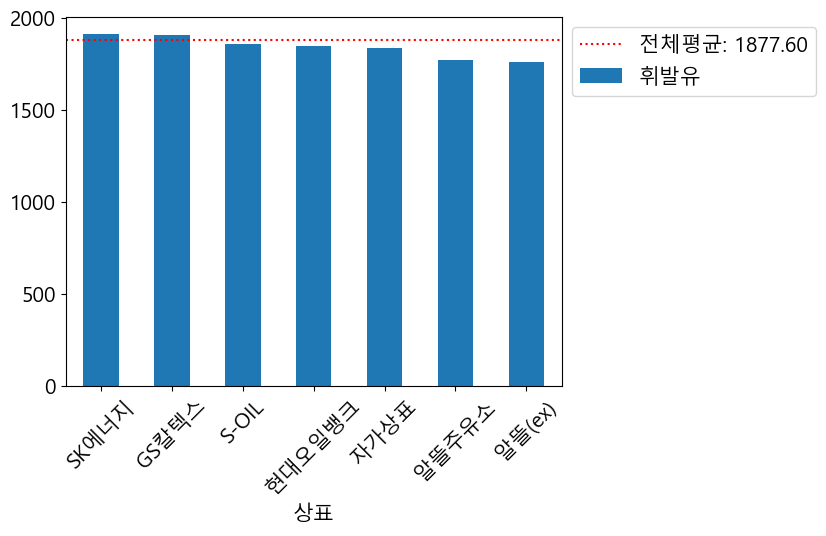

In [85]:
# 상표별 휘발유 평균가격 시각화 -> bar plot

전체평균 = df['휘발유'].mean()

# 상표별 평균 시각화
휘발유_상표별_평균.sort_values(ascending=False).plot(kind='bar', rot=45)
# 전체평균 표시
plt.axhline(전체평균, color="red", linestyle=":", label=f"전체평균: {전체평균:.2f}")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

In [87]:
# 셀프주유소와 일반주유소 개수 확인
df['셀프여부'].value_counts()
df['셀프여부'].value_counts(normalize=True)

셀프여부
셀프    0.562238
일반    0.437762
Name: proportion, dtype: float64

In [88]:
# 셀프 여부에 따른 휘발유 평균 가격 비교 
df.groupby("셀프여부")["휘발유"].mean()

셀프여부
셀프    1818.216376
일반    1953.870993
Name: 휘발유, dtype: float64

In [90]:
df.query("휘발유 != 0").groupby("셀프여부")["휘발유"].mean()

셀프여부
셀프    1820.637908
일반    1958.713098
Name: 휘발유, dtype: float64

In [92]:
# 상표별 일반/셀프 주유소의 휘발유 가격 평균 비교
df.query(" 휘발유 != 0").groupby(['상표', "셀프여부"])["휘발유"].mean()
df.query(" 휘발유 != 0").groupby(['상표', "셀프여부"])["휘발유"].mean().unstack()

셀프여부,셀프,일반
상표,,
GS칼텍스,1828.562962,2005.825721
S-OIL,1820.122748,1932.884711
SK에너지,1827.000349,2007.517369
알뜰(ex),1759.884932,NaN
알뜰주유소,1757.196152,1796.201557
자가상표,2017.000000,1836.866022
현대오일뱅크,1813.739309,1885.390495


In [96]:
상표_셀프여부_휘발유_평균 = df.query("휘발유!=0").pivot_table(index="상표", columns="셀프여부", 
                                                           values="휘발유", aggfunc="mean",
                                                           margins=True)
상표_셀프여부_휘발유_평균

셀프여부,셀프,일반,All
상표,,,
GS칼텍스,1828.562962,2005.825721,1908.343496
S-OIL,1820.122748,1932.884711,1859.541206
SK에너지,1827.000349,2007.517369,1910.959577
알뜰(ex),1759.884932,NaN,1759.884932
알뜰주유소,1757.196152,1796.201557,1769.908373
자가상표,2017.000000,1836.866022,1838.590971
현대오일뱅크,1813.739309,1885.390495,1846.510441
All,1820.637908,1958.713098,1881.043123


In [ ]:
### DataFrame.plot()
#### index명이 X축으로 들어오고 컬럼의 값을 이용해서 그래프를 그림.
##### 컬럼이 여러개일때는 하나의 Axes에 따로 따로 그린다.

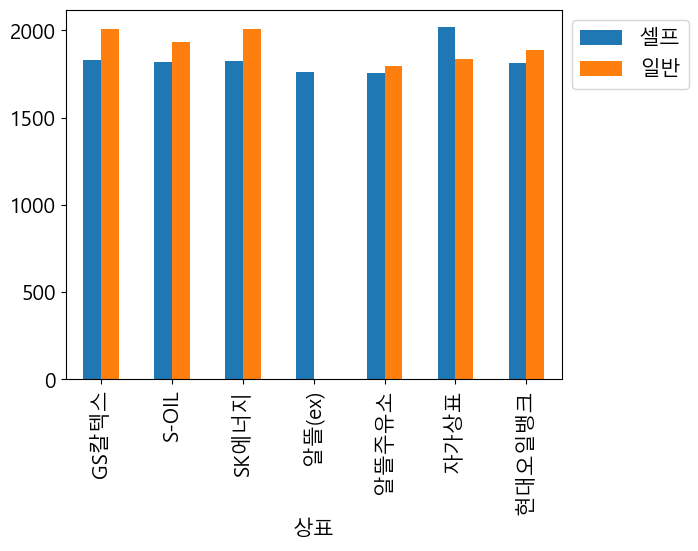

In [101]:
# 상표별 일반/셀프 주유소의 휘발유 가격 평균 비교 시각화
## 상표_셀프여부_휘발유_평균에 서 ALL을 빼고 시각화
상표_셀프여부_휘발유_평균.iloc[:-1, :-1].plot(kind='bar')
plt.legend(bbox_to_anchor=(1,1), loc='left')

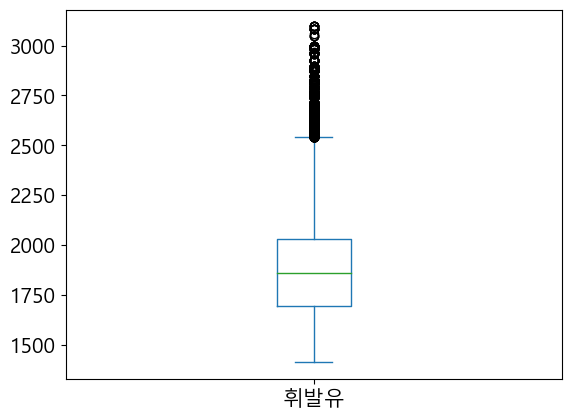

In [105]:
## 휘발유 가격의 분포
df.query('휘발유!=0')['휘발유'].plot(kind='box');

In [109]:
import warnings
warnings.filterwarnings(action='ignore')

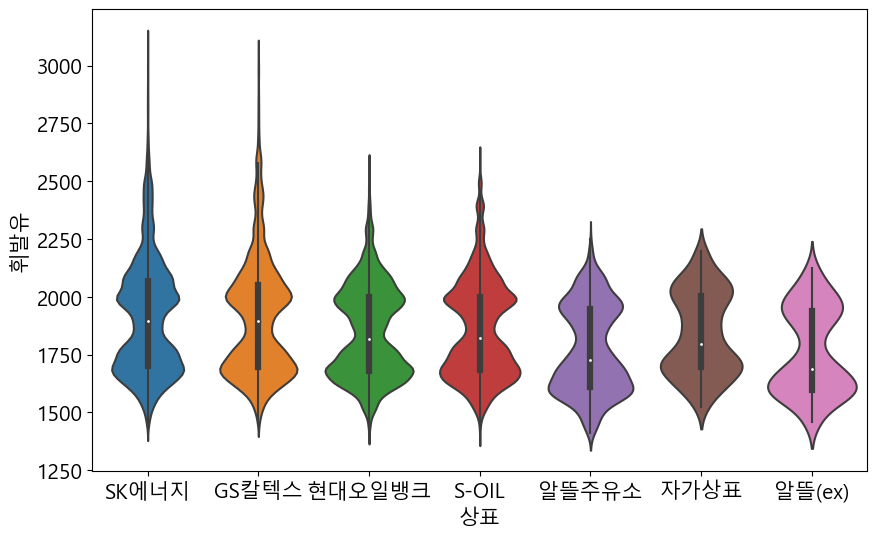

In [111]:
# 상표별 휘발유 가격의 분포를 boxplot으로 시각화
#### 범주형 컬럼을 이용해 group별로 나눠서 시각화 ====> seaborn 이 편함. 
plt.figure(figsize=(10,6))
# sns.boxplot(data=df.query("휘발유!=0"), y='휘발유', x="상표")
sns.violinplot(data=df.query("휘발유!=0"), y='휘발유', x="상표")
plt.show()


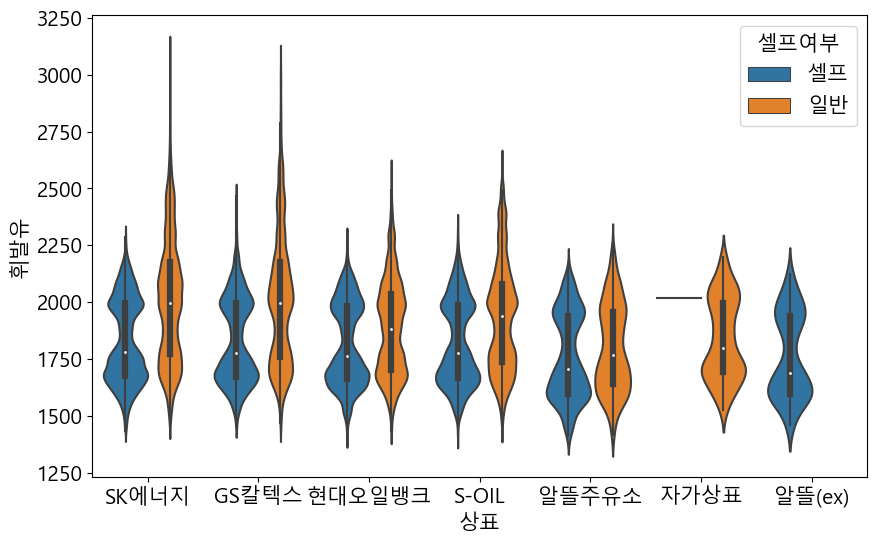

In [113]:
# 상표별 일반/셀프 주유소의 휘발유 가격에 대한 분포 확인 - boxplot으로 시각화
plt.figure(figsize=(10,6))
# sns.boxplot(data=df.query("휘발유!=0"), y='휘발유', x="상표", hue="셀프여부")
sns.violinplot(data=df.query("휘발유!=0"), y='휘발유', x="상표", hue="셀프여부")
plt.show()

In [118]:
# 구별 휘발유 가격의 평균
구별_휘발유_평균 = df.query('휘발유 != 0').groupby("구")['휘발유'].mean().sort_values(ascending=False)
구별_휘발유_평균

구
용산구     2220.150152
중구      2164.813156
종로구     2130.644512
강남구     2027.348234
성동구     1927.180711
강동구     1911.814372
서초구     1908.632928
마포구     1883.471491
영등포구    1867.273173
구로구     1866.193142
관악구     1855.413983
동작구     1850.987097
송파구     1847.526087
노원구     1846.423689
강서구     1829.916928
동대문구    1826.440487
은평구     1823.821755
광진구     1820.783333
서대문구    1820.522224
성북구     1807.024316
중랑구     1805.788631
금천구     1804.142998
양천구     1803.676968
도봉구     1801.099349
강북구     1787.720341
Name: 휘발유, dtype: float64

In [123]:
구별_휘발유_평균.index[0]

'용산구'

In [124]:
# 평균 가격이 가장 높은 구의 상표별 휘발유 평균가격
df.query('구 == @구별_휘발유_평균.index[0]').groupby("상표")['휘발유'].mean()

상표
GS칼텍스     2386.086653
SK에너지     2245.048402
현대오일뱅크    2013.058905
Name: 휘발유, dtype: float64

In [126]:
# 월 평균 휘발유 가격
월별_휘발유_평균 = df.query('휘발유 != 0').groupby('월')["휘발유"].mean()
월별_휘발유_평균

월
1     1705.212460
2     1782.078505
3     2011.746876
4     2036.850250
5     2027.546073
6     2151.490272
7     2082.968590
8     1858.737602
9     1799.950232
10    1737.664435
11    1719.719665
12    1648.983053
Name: 휘발유, dtype: float64

In [127]:
월별_휘발유_평균.sort_values()

월
12    1648.983053
1     1705.212460
11    1719.719665
10    1737.664435
2     1782.078505
9     1799.950232
8     1858.737602
3     2011.746876
5     2027.546073
4     2036.850250
7     2082.968590
6     2151.490272
Name: 휘발유, dtype: float64

In [131]:
# 각 구의 월별 평균 휘발유 가격 
월_구별_휘발유_평균가격 = df.query("휘발유!=0").groupby(["구", "월"])['휘발유'].mean()
월_구별_휘발유_평균가격.unstack()

월,1,2,3,4,5,6,7,8,9,10,11,12
구,,,,,,,,,,,,
강남구,1845.037951,1914.714286,2113.529299,2138.078788,2137.114674,2273.512745,2223.274194,2013.865275,1965.875000,1916.990503,1912.334681,1864.611718
강동구,1740.217391,1797.400510,2024.729167,2075.559524,2055.983871,2174.080952,2125.896313,1910.246544,1829.524038,1762.182028,1747.871429,1693.755760
강북구,1599.384615,1692.991758,1954.910670,1968.938462,1946.035230,2077.157576,1976.936986,1756.037634,1692.447222,1640.524194,1624.188889,1542.555256
강서구,1657.352823,1744.524554,1968.371976,1996.155370,1989.009073,2118.266180,2037.915992,1814.660137,1744.274747,1679.471163,1655.586869,1573.269608
관악구,1693.370370,1767.613811,1992.619816,2012.595238,1986.184758,2117.292857,2061.854839,1829.476959,1778.404306,1712.705069,1686.050360,1616.750588
광진구,1643.827586,1733.171838,1965.270968,1975.047281,1959.891705,2096.482014,2018.152074,1785.532258,1734.718670,1666.218362,1654.041026,1589.910798
구로구,1679.963134,1754.278912,2005.556068,2038.362460,2015.151613,2132.770000,2078.689935,1854.947798,1786.936667,1719.793548,1695.270000,1624.073211
금천구,1643.854839,1718.961310,1953.561404,1966.767584,1941.687316,2081.944444,1998.354839,1788.944282,1731.793939,1664.614706,1633.449541,1547.234421
노원구,1671.234914,1749.078571,1981.651613,2007.235556,2007.703226,2117.348889,2070.651613,1829.000000,1767.555556,1683.490323,1666.338530,1600.125270


In [139]:
pd.options.display.max_columns = 30

In [140]:
월_구별_휘발유_평균가격 = round(df.query("휘발유!=0").pivot_table(index="월", columns="구", values="휘발유", aggfunc="mean"), 2)
월_구별_휘발유_평균가격

구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
월,,,,,,,,,,,,,,,,,,,,,,,,,
1,1845.04,1740.22,1599.38,1657.35,1693.37,1643.83,1679.96,1643.85,1671.23,1613.96,1644.44,1683.45,1730.17,1640.01,1736.54,1734.80,1632.61,1678.79,1633.02,1700.58,2046.39,1641.13,1924.91,2002.51,1624.84
2,1914.71,1797.40,1692.99,1744.52,1767.61,1733.17,1754.28,1718.96,1749.08,1702.60,1725.77,1759.79,1793.30,1722.96,1810.23,1810.23,1715.84,1741.30,1711.94,1777.38,2119.34,1718.21,1995.06,2073.92,1714.38
3,2113.53,2024.73,1954.91,1968.37,1992.62,1965.27,2005.56,1953.56,1981.65,1964.16,1973.45,1994.85,2018.03,1961.00,2022.52,2042.38,1961.17,1967.73,1945.77,2020.53,2323.99,1956.02,2193.61,2279.66,1948.59
4,2138.08,2075.56,1968.94,1996.16,2012.60,1975.05,2038.36,1966.77,2007.24,1974.97,1986.57,2012.12,2029.15,1991.92,2057.17,2078.88,1978.13,2001.12,1964.69,2040.61,2358.30,1988.99,2248.84,2289.25,1977.86
5,2137.11,2055.98,1946.04,1989.01,1986.18,1959.89,2015.15,1941.69,2007.70,1958.48,1974.71,1992.06,2036.11,1973.36,2052.73,2060.63,1957.71,1991.34,1956.67,2027.46,2387.13,1966.93,2252.17,2325.95,1954.36
6,2273.51,2174.08,2077.16,2118.27,2117.29,2096.48,2132.77,2081.94,2117.35,2086.65,2100.45,2105.01,2162.42,2099.05,2169.57,2190.38,2088.65,2115.77,2084.83,2143.57,2471.29,2087.96,2350.65,2434.63,2076.31
7,2223.27,2125.90,1976.94,2037.92,2061.85,2018.15,2078.69,1998.35,2070.65,2002.05,2036.37,2033.61,2082.37,2023.47,2103.18,2143.46,2012.29,2058.98,2004.27,2056.82,2381.95,2028.06,2327.39,2331.20,2022.89
8,2013.87,1910.25,1756.04,1814.66,1829.48,1785.53,1854.95,1788.94,1829.00,1774.89,1795.30,1814.77,1858.82,1798.13,1886.70,1915.36,1772.32,1826.30,1773.62,1836.01,2165.80,1804.53,2158.13,2137.11,1773.06
9,1965.88,1829.52,1692.45,1744.27,1778.40,1734.72,1786.94,1731.79,1767.56,1712.80,1735.96,1763.07,1804.10,1743.46,1835.89,1848.38,1711.79,1758.67,1715.98,1767.26,2130.39,1742.32,2110.46,2100.51,1717.47


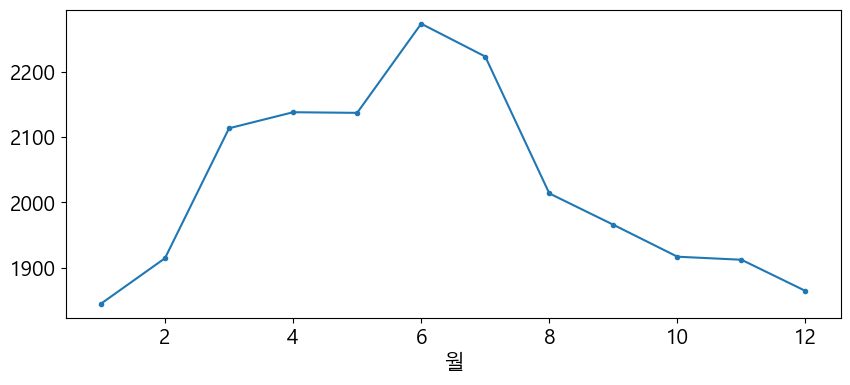

In [144]:
# 각 구의 월별 평균가격의 변화추이 시각화
##  한개 구(강남구)
월_구별_휘발유_평균가격['강남구'].plot(figsize=(10,4), marker=".");

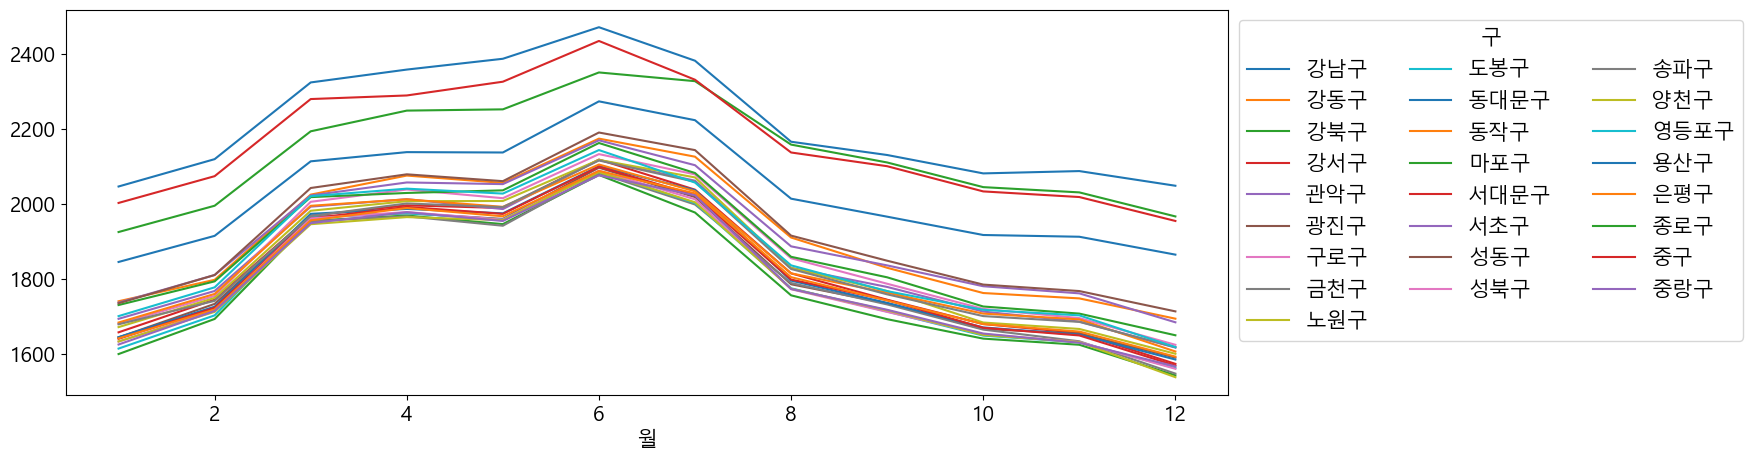

In [150]:
월_구별_휘발유_평균가격.plot(figsize=(15, 5));
plt.legend(bbox_to_anchor=(1,1), 
           loc="upper left", 
           ncol=3, title="구")

In [164]:
a= df.query('휘발유 != 0').groupby(["상호", "주소"])["휘발유"].max()
a.sort_values(ascending=False)
a.sort_values().head(5)

상호                 주소                       
(주)동원석유            경기도 부천시 원미구  부흥로 182 (중동)    1654
송파알찬주유소            서울 송파구 백제고분로 229 (삼전동)       1690
(주)명보에너지           경기도 시흥시  수인로 2186 (목감동)      1755
정다운셀프주유소           서울 도봉구 도봉로 635               1759
오션네트웍스(주) 서울식물원지점  서울 강서구 양천로 300               1940
Name: 휘발유, dtype: int64

In [165]:
# 가장 휘발유가격이 비싼 주유소 상위 5 - (같은 주유소가 여러개 나오므로 가장 비싼 가격을 기준으로 집계)
#### 주유소별로 제일 비쌀때 가격.
휘발유_비싼_주유소 = df.query('휘발유 != 0').groupby(["상호", "주소"])["휘발유"].max().sort_values(ascending=False)
휘발유_비싼_주유소.head()

상호      주소                     
서남주유소   서울 중구 통일로 30               3096
서계주유소   서울 용산구  청파로 367 (청파동)      3050
필동주유소   서울 중구 퇴계로 196 (필동2가)       2789
동자동주유소  서울 용산구 한강대로104길 6 (동자동)    2690
한석주유소   서울 용산구 이촌로 164             2681
Name: 휘발유, dtype: int64

In [166]:
# 가장 휘발유가격이 저렴한 주유소 상위 5 - (같은 주유소가 여러개 나오므로 가장 비싼 가격을 기준으로 집계)
휘발유_싼_주유소 = df.query('휘발유 != 0').groupby(["상호", "주소"])["휘발유"].max().sort_values()
휘발유_싼_주유소.head()

상호                 주소                       
(주)동원석유            경기도 부천시 원미구  부흥로 182 (중동)    1654
송파알찬주유소            서울 송파구 백제고분로 229 (삼전동)       1690
(주)명보에너지           경기도 시흥시  수인로 2186 (목감동)      1755
정다운셀프주유소           서울 도봉구 도봉로 635               1759
오션네트웍스(주) 서울식물원지점  서울 강서구 양천로 300               1940
Name: 휘발유, dtype: int64

In [168]:
# 휘발유 비싼 주유소의 상위 5개의 상호, 주소, 상표, 셀프여부,  조회 - 위에서 조회한 결과에 추가 정보(상표, 셀프여부 등) 조회 (중복제거-drop_duplicates)
휘발유_비싼_주유소.head()

상호      주소                     
서남주유소   서울 중구 통일로 30               3096
서계주유소   서울 용산구  청파로 367 (청파동)      3050
필동주유소   서울 중구 퇴계로 196 (필동2가)       2789
동자동주유소  서울 용산구 한강대로104길 6 (동자동)    2690
한석주유소   서울 용산구 이촌로 164             2681
Name: 휘발유, dtype: int64

In [180]:
# 휘발유_비싼_주유소.head().index
# 멀티 index에서 index명을 각각 조회.
# 휘발유_비싼_주유소.head().index.get_level_values(0) # level 지정하면 그 level의 index이름들을 묶어서 반환.
휘발유_비싼_주유소.head().index.get_level_values(1)

Index(['서울 중구 통일로 30', '서울 용산구  청파로 367 (청파동)', '서울 중구 퇴계로 196 (필동2가)',
       '서울 용산구 한강대로104길 6 (동자동)', '서울 용산구 이촌로 164'],
      dtype='object', name='주소')

In [185]:
df.query("상호 in @휘발유_비싼_주유소.head().index.get_level_values(0)  and \
          주소 in @휘발유_비싼_주유소.head().index.get_level_values(1)")[["상호", "주소", "상표", "셀프여부"]].drop_duplicates()

,상호,주소,상표,셀프여부
72190,동자동주유소,서울 용산구 한강대로104길 6 (동자동),SK에너지,일반
72371,서계주유소,서울 용산구 청파로 367 (청파동),GS칼텍스,일반
73095,한석주유소,서울 용산구 이촌로 164,SK에너지,일반
78766,서남주유소,서울 중구 통일로 30,SK에너지,일반
79846,필동주유소,서울 중구 퇴계로 196 (필동2가),GS칼텍스,일반


In [186]:
# 휘발유 저렴한 주유소의 상위 5개의 상호, 주소, 상표, 셀프여부,  조회 - 위에서 조회한 결과에 추가 정보(상표, 셀프여부 등) 조회 (중복제거-drop_duplicates)
df.query("상호 in @휘발유_싼_주유소.head().index.get_level_values(0)  and \
          주소 in @휘발유_싼_주유소.head().index.get_level_values(1)")[["상호", "주소", "상표", "셀프여부"]].drop_duplicates()

,상호,주소,상표,셀프여부
25556,(주)명보에너지,경기도 시흥시 수인로 2186 (목감동),알뜰주유소,일반
32304,정다운셀프주유소,서울 도봉구 도봉로 635,SK에너지,셀프
43575,(주)동원석유,경기도 부천시 원미구 부흥로 182 (중동),S-OIL,셀프
59953,송파알찬주유소,서울 송파구 백제고분로 229 (삼전동),S-OIL,셀프
97148,오션네트웍스(주) 서울식물원지점,서울 강서구 양천로 300,SK에너지,셀프


In [189]:
# 고급 휘발유를 가장 많이 파는 구 조회
df.query('고급휘발유 != 0').groupby('구')['고급휘발유'].count().sort_values(ascending=False)

구
강남구     10784
서초구      8460
송파구      6295
성북구      4727
용산구      4537
강서구      4515
영등포구     4499
성동구      3719
양천구      3145
종로구      2930
은평구      2910
중구       2871
서대문구     2550
광진구      2519
노원구      2361
동작구      1877
도봉구      1838
관악구      1822
마포구      1819
동대문구     1815
금천구      1662
구로구      1598
강동구      1553
중랑구      1225
강북구      1211
Name: 고급휘발유, dtype: int64

In [194]:
# 고급 휘발유를 가장 많이 파는 구 조회 ==> 실제 주유소가 몇개인지.
df.query('고급휘발유!=0')[["구", "상호", "주소"]].drop_duplicates().groupby("구")['상호'].count().sort_values(ascending=False)

구
강남구     30
서초구     26
송파구     18
성북구     15
강서구     13
용산구     13
영등포구    13
성동구     11
종로구      9
양천구      9
은평구      8
중구       8
광진구      7
노원구      7
서대문구     7
동작구      6
강동구      6
도봉구      6
마포구      5
동대문구     5
금천구      5
구로구      5
관악구      5
강북구      5
중랑구      4
Name: 상호, dtype: int64

In [ ]:
###############################################################################
# 주유소 가격 데이터를 이용해서 알고 싶은 정보들을 추가 분석해 보세요.
###############################################################################
